<a href="https://colab.research.google.com/github/vivekjangid17/Potato-disease-detection/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [9]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [10]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os

dataset_path = '/content/drive/MyDrive/PlantVillage'
print(os.listdir(dataset_path))

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [13]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [14]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

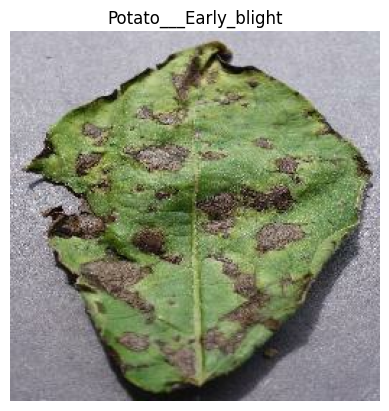

In [15]:
for image_batch, labels_batch in dataset.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    plt.imshow(first_image)
    plt.axis("off")
    plt.title(class_names[labels_batch[0]])
    plt.show()

(32, 256, 256, 3)
[0 1 0 0 0 1 1 1 0 1 1 2 1 0 2 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1]


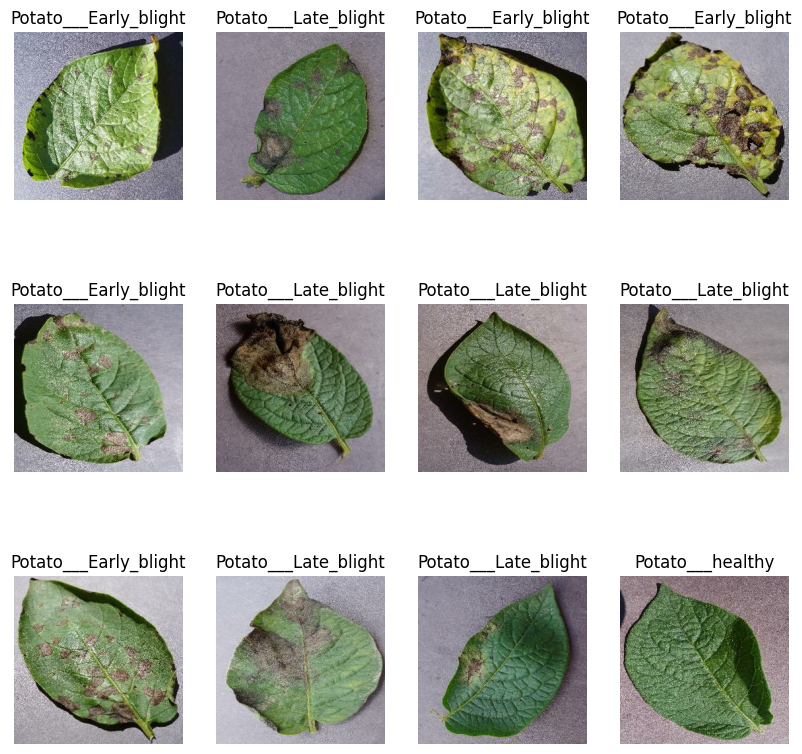

In [16]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
      ax = plt.subplot(3,4,i+1)

      plt.title(class_names[labels_batch[i]])
      plt.imshow(image_batch[i].numpy().astype('uint8'))
      plt.axis("off")

80% ==> Training
20% ==> Test
10% ==> Validation
10% ==> Test


In [17]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [18]:
train_ds = dataset.take(54)
len(train_ds)

54

In [19]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [20]:
validation_size = 0.1
len(dataset)*validation_size

6.800000000000001

In [21]:
validation_ds = test_ds.take(6)
len(validation_ds)

6

In [22]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [23]:
def get_dataset_partitions_tf(ds, train_split=0.8, validation_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + validation_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    validation_size = int(validation_split * ds_size)

    train_ds = ds.take(train_size)
    validation_ds = ds.skip(train_size).take(validation_size)
    test_ds = ds.skip(train_size).skip(validation_size)

    return train_ds, validation_ds, test_ds

In [24]:
trian_ds, validation_ds, test_ds = get_dataset_partitions_tf(dataset)

In [25]:
len(trian_ds)

54

In [26]:
len(validation_ds)

6

In [27]:
len(test_ds)

8

In [28]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [29]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch[0].numpy()/255)

[[[0.7372549  0.7176471  0.7411765 ]
  [0.7764706  0.75686276 0.78039217]
  [0.78039217 0.7607843  0.78431374]
  ...
  [0.7529412  0.7411765  0.76862746]
  [0.7529412  0.7411765  0.76862746]
  [0.7294118  0.7176471  0.74509805]]

 [[0.74509805 0.7254902  0.7490196 ]
  [0.7882353  0.76862746 0.7921569 ]
  [0.7921569  0.77254903 0.79607844]
  ...
  [0.7411765  0.7294118  0.75686276]
  [0.7372549  0.7254902  0.7529412 ]
  [0.7254902  0.7137255  0.7411765 ]]

 [[0.7294118  0.70980394 0.73333335]
  [0.76862746 0.7490196  0.77254903]
  [0.76862746 0.7490196  0.77254903]
  ...
  [0.7294118  0.7176471  0.74509805]
  [0.72156864 0.70980394 0.7372549 ]
  [0.7294118  0.7176471  0.74509805]]

 ...

 [[0.59607846 0.5686275  0.59607846]
  [0.59607846 0.5686275  0.59607846]
  [0.6156863  0.5882353  0.6156863 ]
  ...
  [0.52156866 0.5019608  0.5294118 ]
  [0.5529412  0.53333336 0.56078434]
  [0.5882353  0.5686275  0.59607846]]

 [[0.5803922  0.5529412  0.5803922 ]
  [0.5803922  0.5529412  0.5803922 ]


In [30]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])


In [31]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


In [32]:
from tensorflow.keras import layers
import tensorflow as tf

IMAGE_SIZE = 224  # example

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])


In [33]:
CHANNELS

3

In [34]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),

])
model.build(input_shape=input_shape)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 222, 222, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 111, 111, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 109, 109, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 54, 54, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 52, 52, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 26, 26, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 24, 24, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 12, 12, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 10, 10, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 5, 5, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 3, 3, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 1, 1, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,459 (669.76 KB)

 Trainable params: 171,459 (669.76 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=validation_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 575ms/step - accuracy: 0.4744 - loss: 0.9382 - val_accuracy: 0.4167 - val_loss: 0.9233
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5788 - loss: 0.7739 - val_accuracy: 0.6250 - val_loss: 0.8341
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7130 - loss: 0.6127 - val_accuracy: 0.7917 - val_loss: 0.4995
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8179 - loss: 0.4325 - val_accuracy: 0.8571 - val_loss: 0.3713
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8702 - loss: 0.3113 - val_accuracy: 0.9405 - val_loss: 0.1996
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9013 - loss: 0.2571 - val_accuracy: 0.7143 - val_loss: 0.6738
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8765 - loss: 0.3209 - val_accuracy: 0.8810 - val_loss: 0.3100
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9126 - loss: 0.2457 - val_accuracy: 0.8095 -

In [38]:
len(test_ds)

8

In [39]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9892 - loss: 0.0449


In [40]:
scores

[0.03945278748869896, 0.98828125]

In [41]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [42]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [43]:
history.history['loss']

[0.9014034867286682,
 0.7359051704406738,
 0.5565182566642761,
 0.37494853138923645,
 0.3181709051132202,
 0.2726835012435913,
 0.2490166574716568,
 0.22446222603321075,
 0.14025460183620453,
 0.10686522722244263,
 0.139071524143219,
 0.10263504087924957,
 0.12981946766376495,
 0.10995045304298401,
 0.07372677326202393,
 0.04698773846030235,
 0.07825321704149246,
 0.05335221812129021,
 0.06011034920811653,
 0.07013670355081558,
 0.06854216754436493,
 0.04781777039170265,
 0.054746441543102264,
 0.07938319444656372,
 0.054878558963537216,
 0.05678790435194969,
 0.03781616687774658,
 0.04387980327010155,
 0.06422950327396393,
 0.06766936182975769,
 0.03152048960328102,
 0.03970644995570183,
 0.038408055901527405,
 0.05350213497877121,
 0.04824400693178177,
 0.07681439816951752,
 0.04475091025233269,
 0.042408451437950134,
 0.039934612810611725,
 0.020828139036893845,
 0.025284068658947945,
 0.029650820419192314,
 0.02896110527217388,
 0.046117279678583145,
 0.03742652013897896,
 0.069979

In [44]:
len(history.history['loss'])     # 50

50

In [45]:
history.history['accuracy']

[0.49421295523643494,
 0.6348379850387573,
 0.7413194179534912,
 0.8483796119689941,
 0.8715277910232544,
 0.8912037014961243,
 0.9039351940155029,
 0.9143518805503845,
 0.9432870149612427,
 0.9606481194496155,
 0.953125,
 0.9623842835426331,
 0.9577546119689941,
 0.9612268805503845,
 0.9728009104728699,
 0.9814814925193787,
 0.9733796119689941,
 0.9832175970077515,
 0.9797453880310059,
 0.9739583134651184,
 0.9739583134651184,
 0.9797453880310059,
 0.9809027910232544,
 0.9722222089767456,
 0.9785879850387573,
 0.9803240895271301,
 0.9895833134651184,
 0.984375,
 0.9774305820465088,
 0.9722222089767456,
 0.9890046119689941,
 0.9837962985038757,
 0.9855324029922485,
 0.9826388955116272,
 0.9832175970077515,
 0.9739583134651184,
 0.9837962985038757,
 0.9855324029922485,
 0.9866898059844971,
 0.9936342835426331,
 0.9913194179534912,
 0.9901620149612427,
 0.9895833134651184,
 0.984375,
 0.9878472089767456,
 0.9733796119689941,
 0.9907407164573669,
 0.9959490895271301,
 0.9560185074806213,


In [46]:
acc = history.history['accuracy']   # depends upon ouput of history.history.keys()
validation_acc = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

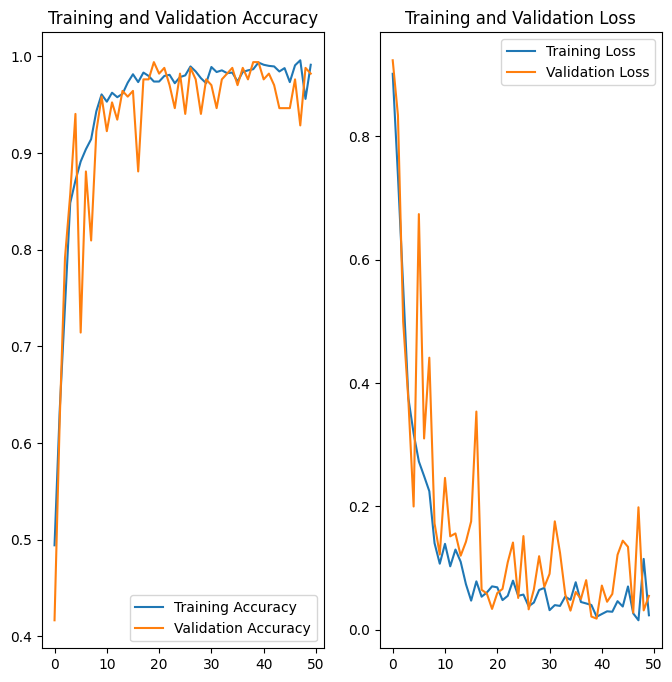

In [47]:
plt. figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), validation_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Fitst image to predict
Actual Label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Predicted Label: Potato___Late_blight


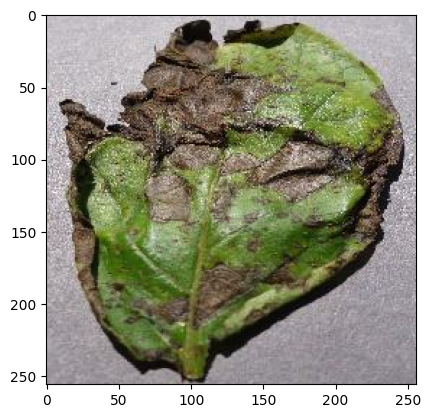

In [48]:
import numpy as np
for images_batch, labels_batch,in test_ds.take(1):

    first_image = image_batch[0].numpy().astype('uint8')

    print("Fitst image to predict")
    plt.imshow(first_image)
    print("Actual Label:", class_names[labels_batch[0].numpy()])

    batch_prediction = model.predict(images_batch)
    print("Predicted Label:", class_names[np.argmax(batch_prediction[0])])

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)   # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


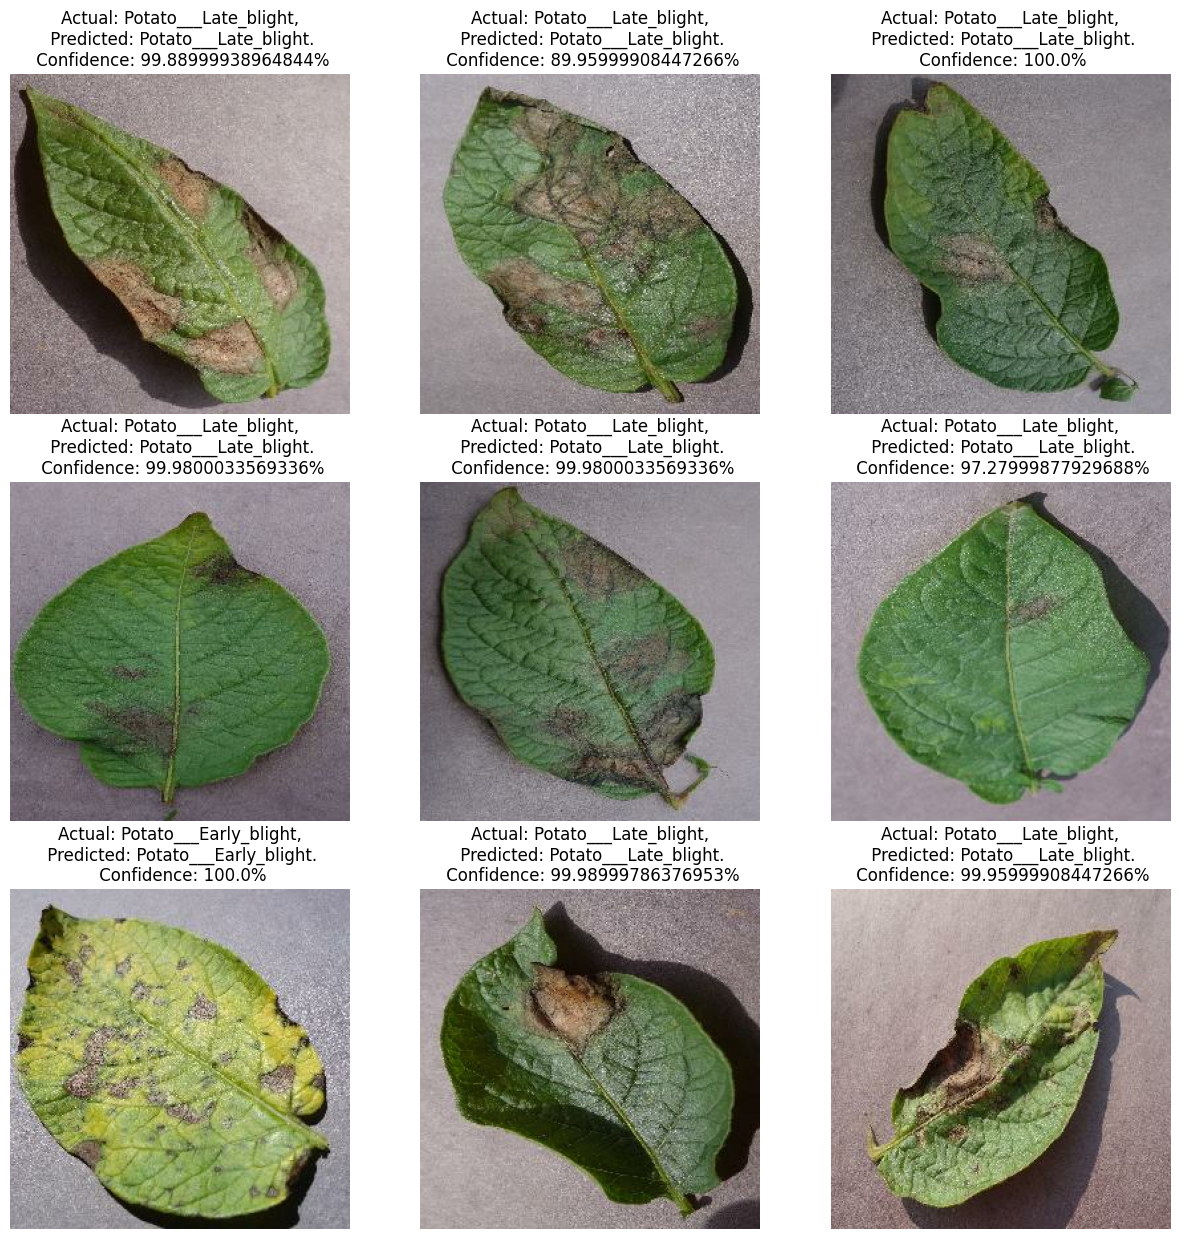

In [50]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")


In [51]:
# import os

# path = "/content/drive/MyDrive/Potato-disease"

# # get only numeric folder names
# versions = [int(i) for i in os.listdir(path) if i.isdigit()]

# # if no numeric folders exist, start with 0
# model_version = max(versions + [0]) + 1

# # save the model in new version folder
# save_path = f"{path}/{model_version}.keras"
# model.save(save_path)

# print(f"Model saved at: {save_path}")


Model saved at: /content/drive/MyDrive/Potato-disease/1.keras


In [ ]:
# model_version = 1
# model.save(f"/content/drive/MyDrive/Potato-disease/{model_version}")

In [54]:
os.listdir("/content/drive/MyDrive/Potato-disease")

['1.keras']

In [ ]:
# model_version = 1
# save_path = f"/content/{model_version}"  # Save locally first
# model.save(save_path)

In [60]:
# import os
# model_version=max([int(i) for i in os.listdir("/content") + [0]])+1
# model.export(f"/content/{model_version}")


ValueError: invalid literal for int() with base 10: '.config'

In [61]:
import os

versions = [int(i) for i in os.listdir("/content") if i.isdigit()] or [0]
model_version = max(versions) + 1
model.export(f"/content/{model_version}")

print(f"✅ Model exported successfully to /content/{model_version}")

Saved artifact at '/content/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  134444083740304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134444083737424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134443617445328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134443617446096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134443617442256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134443617443984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134443617447248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134443617446480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134443617447632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134443617447440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134443617444176: Ten

In [63]:
!mkdir -p /content/drive/MyDrive/Potato-disease/
!cp -r /content/2 /content/drive/MyDrive/Potato-disease/
